In [29]:
# import necessary libraries for data analysis and visulization
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mpld3

In [30]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler

In [31]:
allteam_overall_box_2019_20 = pd.read_csv('allteam_overall_box_2019_20.csv')
test = allteam_overall_box_2019_20.groupby('TEAM_ABBREVIATION').mean()
test.drop(['Unnamed: 0','TEAM_ID','GAME_ID','MIN_x'],1,inplace=True)
test

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,40.192982,89.736842,0.449281,11.754386,35.508772,0.330596,18.385965,23.280702,0.787667,9.508772,...,15.849123,0.514930,0.553754,1.0,0.198702,105.890351,103.516842,86.264211,104.403509,0.452860
BKN,39.981481,90.277778,0.443852,12.722222,37.333333,0.344093,17.740741,23.870370,0.747815,10.722222,...,15.159259,0.514815,0.549111,1.0,0.198148,104.007407,101.707037,84.755926,103.037037,0.500815
BOS,41.240741,89.166667,0.463315,12.333333,33.907407,0.365167,18.277778,22.796296,0.802833,10.500000,...,13.750000,0.532426,0.571185,1.0,0.198296,101.861111,99.951111,83.292593,100.537037,0.534352
CHA,37.381818,86.054545,0.434891,11.927273,34.400000,0.343436,16.218182,21.654545,0.749691,11.054545,...,15.165455,0.504309,0.539182,1.0,0.197782,98.709273,96.656727,80.547818,97.363636,0.455618
CHI,39.089286,88.410714,0.443625,12.107143,35.160714,0.344696,15.857143,20.857143,0.756786,10.285714,...,15.223214,0.512393,0.545268,1.0,0.198089,101.892679,100.513929,83.761786,101.035714,0.466429
CLE,40.074074,88.333333,0.454870,11.129630,32.000000,0.344519,14.851852,19.407407,0.764037,10.851852,...,16.448148,0.518037,0.549185,1.0,0.197926,101.125926,99.283704,82.736111,99.814815,0.451000
DAL,41.472727,89.818182,0.462055,15.218182,41.036364,0.371218,18.272727,23.400000,0.781636,11.054545,...,12.496364,0.546545,0.582455,1.0,0.197927,100.841091,99.308727,82.757091,99.981818,0.522436
DEN,41.654545,89.618182,0.466000,10.909091,30.581818,0.352309,16.218182,20.872727,0.775073,11.036364,...,13.420000,0.527218,0.560091,1.0,0.198145,99.605818,97.576000,81.313455,98.618182,0.521836
DET,39.655172,85.948276,0.462448,11.810345,32.086207,0.370172,16.827586,22.603448,0.746017,9.896552,...,15.737931,0.531466,0.564138,1.0,0.197638,100.520862,98.397414,81.997069,99.224138,0.476776


In [32]:
nba_teams = pd.read_csv('nba_teams.csv')
nba_teams = nba_teams.sort_values(by='full_name')
playoff_team_name = ['BOS','DAL','DEN','HOU','LAC','LAL','MIA','MIL','IND','PHI','OKC','TOR','UTA']
playoff_teams = nba_teams[nba_teams['abbreviation'].isin(playoff_team_name)]
playoff_teams = playoff_teams.reset_index(drop=True)
non_playoff_teams = nba_teams[~nba_teams['abbreviation'].isin(playoff_team_name)]
non_playoff_teams

,Unnamed: 0,id,full_name,abbreviation,nickname,city,state,year_founded
0,0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
2,14,1610612751,Brooklyn Nets,BKN,Nets,Brooklyn,New York,1976
3,29,1610612766,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
4,4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
8,28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948
9,7,1610612744,Golden State Warriors,GSW,Warriors,San Francisco,California,1946
14,26,1610612763,Memphis Grizzlies,MEM,Grizzlies,Memphis,Tennessee,1995
17,13,1610612750,Minnesota Timberwolves,MIN,Timberwolves,Minneapolis,Minnesota,1989
18,3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002


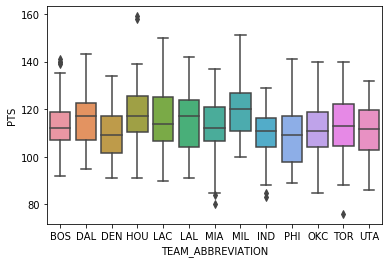

In [33]:
playoff_teams_overall_box_2019_20 = allteam_overall_box_2019_20[allteam_overall_box_2019_20['TEAM_ABBREVIATION'].isin(playoff_team_name)]

sns.boxplot(x='TEAM_ABBREVIATION',y='PTS', data=playoff_teams_overall_box_2019_20)

### Use of KMeans Clustering model to devide teams into groups

#### Based on Offensive Rating, Defensive rating, Net Rating and Pace

In [34]:
features = ['OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PACE']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
def_rating_mean = test['DEF_RATING'].mean() * np.ones(2)

test_off_def = test[features].round(2)

# run k-means clustering
kmeans = KMeans(n_clusters=8, random_state=0).fit(test_off_def)

# add cluster labels generated for each row in the dataframe
test_off_def.insert(0, 'Team Labels, Kmeans', kmeans.labels_)

# Sort 'Team Labels' based on net rating
kmeans_labels = [0,1,2,3,4,5,6]
sort_labels = [3,5,1,6,0,4,2]
test_off_def['Team Labels, Kmeans'].replace(to_replace=kmeans_labels, value=sort_labels, inplace=True)
test_off_def

,"Team Labels, Kmeans",OFF_RATING,DEF_RATING,NET_RATING,PACE
TEAM_ABBREVIATION,,,,,
ATL,6,105.96,113.98,-8.02,103.52
BKN,5,107.29,107.79,-0.49,101.71
BOS,3,112.54,105.64,6.91,99.95
CHA,6,105.77,112.85,-7.07,96.66
CHI,5,105.10,108.29,-3.20,100.51
CLE,6,106.32,115.22,-8.91,99.28
DAL,7,116.58,110.83,5.74,99.31
DEN,0,112.11,108.10,4.00,97.58
DET,4,108.83,111.67,-2.83,98.40


### Use of Spectral Clustering model to devide teams into groups

#### Based on Offensive Rating, Defensive rating, Net Rating and Pace

In [35]:
features = ['OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PACE']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
def_rating_mean = test['DEF_RATING'].mean() * np.ones(2)

test_off_def = test[features].round(2)

# run spectral clustering
spectral = SpectralClustering(n_clusters=8,assign_labels="discretize", random_state=0).fit(test_off_def)

# add cluster labels generated for each row in the dataframe
test_off_def.insert(0, 'Team Labels, Kmeans', kmeans.labels_)
test_off_def.insert(0, 'Team Labels, Spectral', spectral.labels_)

# Sort 'Team Labels' based on net rating
# kmeans_labels = [0,1,2,3,4,5,6]
# sort_labels = [3,5,1,6,0,4,2]
# test_off_def['Team Labels, Spectral'].replace(to_replace=kmeans_labels, value=sort_labels, inplace=True)
test_off_def

,"Team Labels, Spectral","Team Labels, Kmeans",OFF_RATING,DEF_RATING,NET_RATING,PACE
TEAM_ABBREVIATION,,,,,,
ATL,0,3,105.96,113.98,-8.02,103.52
BKN,1,1,107.29,107.79,-0.49,101.71
BOS,5,0,112.54,105.64,6.91,99.95
CHA,0,3,105.77,112.85,-7.07,96.66
CHI,1,1,105.10,108.29,-3.20,100.51
CLE,0,3,106.32,115.22,-8.91,99.28
DAL,7,7,116.58,110.83,5.74,99.31
DEN,7,4,112.11,108.10,4.00,97.58
DET,3,5,108.83,111.67,-2.83,98.40


#### Clustering Results Visualization


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [27/Feb/2020 13:21:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2020 13:21:52] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2020 13:21:52] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


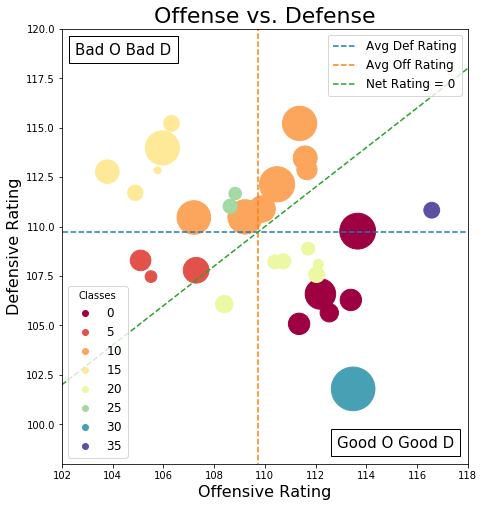

In [36]:
# New figure
fig1 = plt.figure(figsize=(16,8))

# Offense vs. Defense Plot
ax1 = fig1.add_subplot(121)

# Set marker size as Pace
markersize = (test['PACE']-93)**3

# Scatter plot Defensive_Rating vs. Offensive_Rating
scatter1 = ax1.scatter(test_off_def['OFF_RATING'], test_off_def['DEF_RATING'], \
                      c=test_off_def['Team Labels, Kmeans']*5,cmap='Spectral', s=markersize, alpha=1)

# Draw average rating and net rating line
ax1.plot(np.linspace(0,200,num=2), def_rating_mean, linestyle='dashed', label='Avg Def Rating')
ax1.plot(off_rating_mean, np.linspace(0,200,num=2), linestyle='dashed', label='Avg Off Rating')
ax1.plot(np.linspace(0,200,num=2),np.linspace(0,200,num=2), linestyle='dashed', label='Net Rating = 0')

# Set axis range and label
ax1.set_ylim(98,120)
ax1.set_xlim(102,118)
ax1.set_xlabel('Offensive Rating', fontsize='16')
ax1.set_ylabel('Defensive Rating', fontsize='16')
ax1.set_title('Offense vs. Defense', fontsize='22')

# produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower left", title="Classes", fontsize='12')
ax1.add_artist(legend1)

# produce a legend with line plot
legend2 = ax1.legend(loc='upper right', fontsize='12')

# add annotations of bad/good o/f
at1 = AnchoredText("Bad O Bad D",prop=dict(size=15), loc='upper left')
at2 = AnchoredText("Good O Good D",prop=dict(size=15), loc='lower right')
ax1.add_artist(at1)
ax1.add_artist(at2)

# plt.show()

# Set labels as Team_Name and Net_Rating for mpld3 
label1 = test_off_def.index.tolist()
label2 = test_off_def.NET_RATING.tolist()
labels = []
for i in list(range(len(label1))):
    labels.append(label1[i]+','+str(label2[i]))
# set picks 
tooltip = mpld3.plugins.PointLabelTooltip(scatter1, labels=labels)
mpld3.plugins.connect(fig1, tooltip)

mpld3.show()
plt.show()

#### Based on 3PT Attempts, Field Goal Percentage and Ratio

In [46]:
# add column '%FG3A', ratio of 3PT attemps of all field goal attempt
test['%FG3A'] = test['FG3A'] / test['FGA']

features = ['OFF_RATING','%FG3A','FG3M','FG3A','FG3_PCT']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
fg3a_mean = test['FG3A'].mean() * np.ones(2)

# set number of clusters
kclusters = 6
test_3pt = test[features].round(2)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(test_3pt)

# check cluster labels generated for each row in the dataframe
test_3pt.insert(0, 'Team Labels', kmeans.labels_)
test_3pt.insert(0, 'Team Abbreviation', nba_teams.abbreviation.tolist())
# pick only playoffs team for comparison
test_3pt

,Team Abbreviation,Team Labels,OFF_RATING,%FG3A,FG3M,FG3A,FG3_PCT
TEAM_ABBREVIATION,,,,,,,
ATL,ATL,0,105.96,0.40,11.75,35.51,0.33
BKN,BOS,0,107.29,0.41,12.72,37.33,0.34
BOS,BKN,1,112.54,0.38,12.33,33.91,0.37
CHA,CHA,0,105.77,0.40,11.93,34.40,0.34
CHI,CHI,0,105.10,0.40,12.11,35.16,0.34
CLE,CLE,4,106.32,0.36,11.13,32.00,0.34
DAL,DAL,3,116.58,0.46,15.22,41.04,0.37
DEN,DEN,2,112.11,0.34,10.91,30.58,0.35
DET,DET,2,108.83,0.37,11.81,32.09,0.37


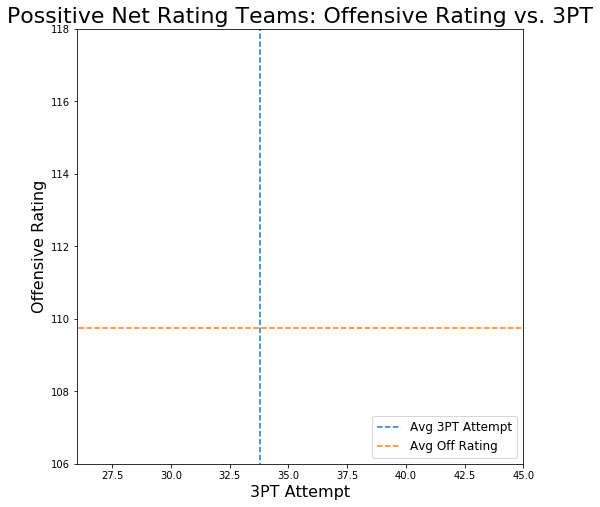

In [47]:
test_3pt = test_3pt[test_3pt.index.isin(playoff_teams['full_name'])]
test1 = test[test.index.isin(playoff_teams['full_name'])]

# Offense vs. 3PT Plot
# ax2 = fig1.add_subplot(122)
fig2, ax2 = plt.subplots(figsize=(8,8))

# Set marker size as Pace
markersize = (test1['PACE']-93)**3

# Scatter plot Defensive_Rating vs. Offensive_Rating
scatter2 = ax2.scatter(test_3pt['FG3A'], test1['OFF_RATING'], \
                      c=test_3pt['Team Labels'], cmap='Paired', s=markersize, alpha=0.8)

# Draw average rating and net rating line
ax2.plot(fg3a_mean, np.linspace(0,200,num=2), linestyle='dashed', label='Avg 3PT Attempt')
ax2.plot(np.linspace(0,200,num=2), off_rating_mean, linestyle='dashed', label='Avg Off Rating')

# produce a legend with line plot
legend2 = ax2.legend(loc='lower right', fontsize='12')

# Set axis range and label
ax2.set_ylim(106,118)
ax2.set_xlim(26,45)
ax2.set_xlabel('3PT Attempt', fontsize='16')
ax2.set_ylabel('Offensive Rating', fontsize='16')
ax2.set_title('Possitive Net Rating Teams: Offensive Rating vs. 3PT', fontsize='22')

# add label for each point
for i,k in enumerate(test_3pt['Team Abbreviation']):
    x = test_3pt['FG3A'][i]
    y = test1['OFF_RATING'][i]
    plt.text(x-1.4, y-0.2, k, fontsize=12)
    
plt.show()

#### Based on Scoring 

In [48]:
# add column '%FG3A', ratio of 3PT attemps of all field goal attempt
test['%FG3A'] = test['FG3A'] / test['FGA']

features = ['OFF_RATING','%FG3A','FG3M','FG3A','FG3_PCT']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
fg3a_mean = test['FG3A'].mean() * np.ones(2)

# set number of clusters
kclusters = 6
test_3pt = test[features].round(2)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(test_3pt)

# check cluster labels generated for each row in the dataframe
test_3pt.insert(0, 'Team Labels', kmeans.labels_)
test_3pt.insert(0, 'Team Abbreviation', nba_teams.abbreviation.tolist())
# pick only playoffs team for comparison
test_3pt

,Team Abbreviation,Team Labels,OFF_RATING,%FG3A,FG3M,FG3A,FG3_PCT
TEAM_ABBREVIATION,,,,,,,
ATL,ATL,0,105.96,0.40,11.75,35.51,0.33
BKN,BOS,0,107.29,0.41,12.72,37.33,0.34
BOS,BKN,1,112.54,0.38,12.33,33.91,0.37
CHA,CHA,0,105.77,0.40,11.93,34.40,0.34
CHI,CHI,0,105.10,0.40,12.11,35.16,0.34
CLE,CLE,4,106.32,0.36,11.13,32.00,0.34
DAL,DAL,3,116.58,0.46,15.22,41.04,0.37
DEN,DEN,2,112.11,0.34,10.91,30.58,0.35
DET,DET,2,108.83,0.37,11.81,32.09,0.37


In [49]:
# load all team scoring box scores and calculate mean for each feature
allteam_scoring_box_team = pd.read_csv('allteam_scoring_box_team_2019_20.csv',converters={'GAME_ID': str})
allteam_scoring = allteam_scoring_box_team.groupby('TEAM_ABBREVIATION').mean()
allteam_scoring.drop(['Unnamed: 0','TEAM_ID'],1,inplace=True)

# merge all team overall box score and scoring box score 
test_allteam_scoring = pd.merge(test, allteam_scoring, left_on=test.index,right_on=allteam_scoring.index, how='left')
test_allteam_scoring.set_index('key_0', inplace=True)

test_scoring = allteam_scoring[allteam_scoring.index.isin(playoff_teams['abbreviation'])].round(3)

# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=1).fit(test_scoring)

# check cluster labels generated for each row in the dataframe
test_scoring.insert(0, 'Team Labels', kmeans.labels_)

# pick only playoffs team for comparison
test_scoring.sort_values(['Team Labels'],inplace=True)
test_scoring

,Team Labels,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
TEAM_ABBREVIATION,,,,,,,,,,,,,,,,
DEN,0,0.659,0.341,0.559,0.114,0.294,0.104,0.147,0.151,0.445,0.557,0.443,0.851,0.149,0.635,0.365
IND,0,0.686,0.314,0.587,0.140,0.277,0.114,0.136,0.152,0.447,0.543,0.457,0.868,0.132,0.621,0.379
LAL,0,0.649,0.351,0.558,0.089,0.292,0.162,0.151,0.164,0.469,0.528,0.472,0.837,0.163,0.610,0.390
DAL,1,0.543,0.457,0.451,0.070,0.391,0.103,0.159,0.127,0.380,0.466,0.534,0.780,0.220,0.585,0.415
BOS,2,0.620,0.380,0.512,0.083,0.325,0.137,0.162,0.162,0.429,0.501,0.499,0.720,0.280,0.566,0.434
LAC,2,0.637,0.363,0.517,0.090,0.307,0.118,0.177,0.150,0.427,0.470,0.530,0.826,0.174,0.572,0.428
OKC,2,0.652,0.348,0.537,0.117,0.284,0.085,0.179,0.149,0.419,0.468,0.532,0.762,0.238,0.548,0.452
UTA,2,0.599,0.401,0.489,0.058,0.353,0.097,0.157,0.129,0.431,0.452,0.548,0.767,0.233,0.553,0.447
MIA,3,0.592,0.408,0.477,0.075,0.346,0.099,0.176,0.141,0.402,0.545,0.455,0.826,0.174,0.637,0.363


Text(0.5, 1.0, '')

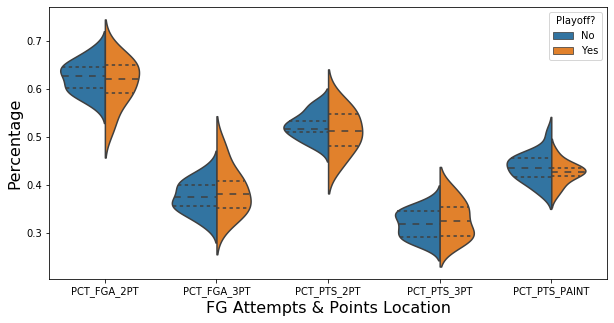

In [50]:
# Compare Playoff teams and non Playoff teams game styles based on scoring box score


# Add labels Playoff and non Playoff teams in df allteam_scoring
allteam_scoring['abbreviation']=allteam_scoring.index
allteam_scoring['Playoff?']=allteam_scoring['abbreviation'].apply(lambda x: 'Yes' if x in playoff_team_name else 'No')

# Use of sns.boxplot to visulize different feagures
temp = pd.DataFrame(columns=['PCT','Category','Playoff?'])
allteam_scoring_plot = pd.DataFrame(columns=['PCT','Category','Playoff?'])

# for i in range(len(allteam_scoring.columns)-2):

for i in [0,1,2,4,8]:
    temp['PCT'] =  allteam_scoring.iloc[:,i].values
    temp['Category'] = allteam_scoring.columns[i]
    temp['Playoff?'] = allteam_scoring.iloc[:,16].values
    allteam_scoring_plot = allteam_scoring_plot.append(temp)

fig,ax = plt.subplots(figsize=(10,5))
ax = sns.violinplot(x='Category',y='PCT',hue='Playoff?',data=allteam_scoring_plot,\
                    split=True,scale="count", inner="quartile")
ax.set_xlabel('FG Attempts & Points Location', fontsize='16')
ax.set_ylabel('Percentage', fontsize='16')
ax.set_title('', fontsize='22')

Text(0.5, 1.0, '')

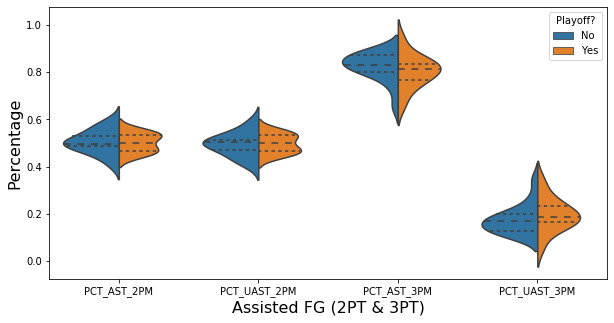

In [42]:
temp = pd.DataFrame(columns=['PCT','Category','Playoff?'])
allteam_scoring_plot = pd.DataFrame(columns=['PCT','Category','Playoff?'])

for i in [9,10,11,12]:
    temp['PCT'] =  allteam_scoring.iloc[:,i].values
    temp['Category'] = allteam_scoring.columns[i]
    temp['Playoff?'] = allteam_scoring.iloc[:,16].values
    allteam_scoring_plot = allteam_scoring_plot.append(temp)

fig,ax = plt.subplots(figsize=(10,5))
ax = sns.violinplot(x='Category',y='PCT',hue='Playoff?',data=allteam_scoring_plot,\
                    split=True,scale="count", inner="quartile")
ax.set_xlabel('Assisted FG (2PT & 3PT)', fontsize='16')
ax.set_ylabel('Percentage', fontsize='16')
ax.set_title('', fontsize='22')

Text(0.5, 1.0, '')

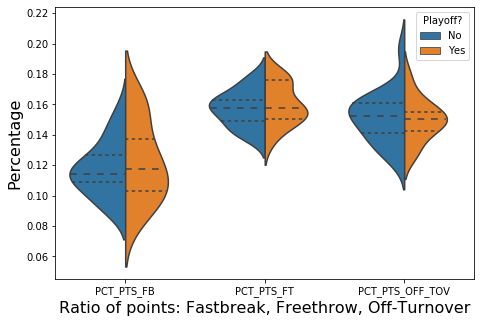

In [43]:
temp = pd.DataFrame(columns=['PCT','Category','Playoff?'])
allteam_scoring_plot = pd.DataFrame(columns=['PCT','Category','Playoff?'])

for i in [5,6,7]:
    temp['PCT'] =  allteam_scoring.iloc[:,i].values
    temp['Category'] = allteam_scoring.columns[i]
    temp['Playoff?'] = allteam_scoring.iloc[:,16].values
    allteam_scoring_plot = allteam_scoring_plot.append(temp)

fig,ax = plt.subplots(figsize=(7.5,5))
ax = sns.violinplot(x='Category',y='PCT',hue='Playoff?',data=allteam_scoring_plot,\
                    split=True,scale="count", inner="quartile")
ax.set_xlabel('Ratio of points: Fastbreak, Freethrow, Off-Turnover', fontsize='16')
ax.set_ylabel('Percentage', fontsize='16')
ax.set_title('', fontsize='22')

In [44]:
tt = pd.DataFrame(allteam_scoring.columns)

In [45]:
# Filter scoring box score
playoff_teams_scoring = allteam_scoring[allteam_scoring.index.isin(playoff_teams.abbreviation)]
non_playoff_teams_scoring = allteam_scoring[allteam_scoring.index.isin(non_playoff_teams.abbreviation)]